# Taller 04 Spines Cubicos
## Integrantes:
## - Christian Ayala
## - Jhonn Saeteros


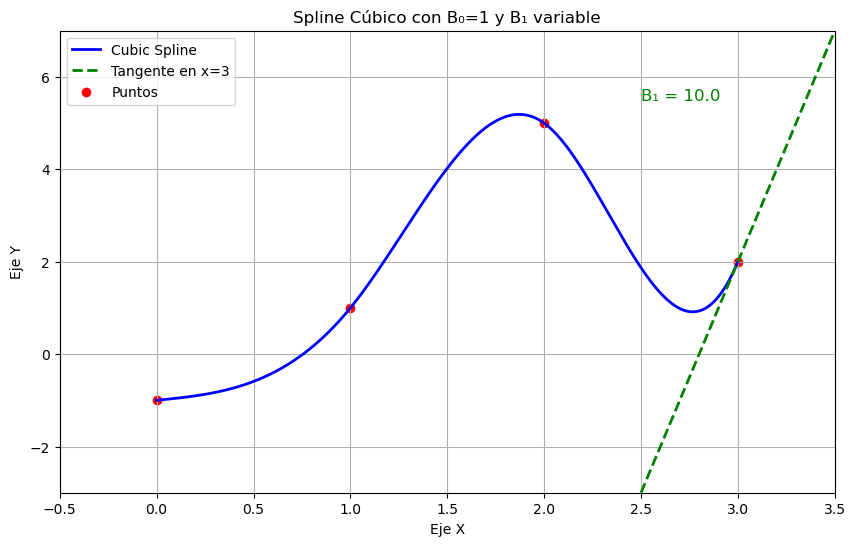

In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Función para calcular spline cúbico con condiciones de frontera (B0, B1)
def cubic_spline_clamped(xs, ys, B0, B1):
    n = len(xs) - 1
    h = [xs[i + 1] - xs[i] for i in range(n)]

    alpha = [0] * (n + 1)
    alpha[0] = 3 * (ys[1] - ys[0]) / h[0] - 3 * B0
    alpha[n] = 3 * B1 - 3 * (ys[n] - ys[n - 1]) / h[n - 1]

    for i in range(1, n):
        alpha[i] = (3 / h[i]) * (ys[i + 1] - ys[i]) - (3 / h[i - 1]) * (ys[i] - ys[i - 1])

    l = [1] + [0] * n
    u = [0] * (n + 1)
    z = [0] * (n + 1)

    for i in range(1, n):
        l[i] = 2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]
        u[i] = h[i] / l[i]
        z[i] = (alpha[i] - h[i - 1] * z[i - 1]) / l[i]

    l[n] = h[n - 1] * (2 - u[n - 1])
    z[n] = (alpha[n] - h[n - 1] * z[n - 1]) / l[n]

    c = [0] * (n + 1)
    b = [0] * n
    d = [0] * n
    a = ys[:-1]

    c[n] = z[n]
    for j in reversed(range(n)):
        c[j] = z[j] - u[j] * c[j + 1]
        b[j] = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d[j] = (c[j + 1] - c[j]) / (3 * h[j])

    x = sym.Symbol("x")
    splines = []
    for j in range(n):
        S = a[j] + b[j] * (x - xs[j]) + c[j] * (x - xs[j])**2 + d[j] * (x - xs[j])**3
        splines.append(S)

    return splines

# Puntos
xs = [0, 1, 2, 3]
ys = [-1, 1, 5, 2]
x_sym = sym.Symbol("x")

# Rango de B1 a animar
B0 = 1
B1_vals = np.linspace(-10, 10, 100)
x_vals = np.linspace(min(xs), max(xs), 300)

# Crear la figura
fig, ax = plt.subplots(figsize=(10, 6))
line, = ax.plot([], [], color='blue', lw=2, label='Cubic Spline')
tangent_line, = ax.plot([], [], 'g--', lw=2, label='Tangente en x=3')
text_label = ax.text(2.5, max(ys) + 0.5, '', fontsize=12, color='green')
points = ax.scatter(xs, ys, color='red', label='Puntos')

ax.set_xlim(min(xs) - 0.5, max(xs) + 0.5)
ax.set_ylim(min(ys) - 2, max(ys) + 2)
ax.set_title('Spline Cúbico con B₀=1 y B₁ variable')
ax.set_xlabel('Eje X')
ax.set_ylabel('Eje Y')
ax.grid()
ax.legend()

# Función de animación
def animate(i):
    B1 = B1_vals[i]
    splines = cubic_spline_clamped(xs, ys, B0, B1)

    y_vals = np.zeros_like(x_vals)
    for j in range(len(xs) - 1):
        mask = (x_vals >= xs[j]) & (x_vals <= xs[j + 1])
        f = sym.lambdify(x_sym, splines[j], modules='numpy')
        y_vals[mask] = f(x_vals[mask])

    # Línea del spline
    line.set_data(x_vals, y_vals)

    # Tangente en x = 3
    slope = B1
    x0 = xs[-1]
    y0 = ys[-1]
    x_range = np.linspace(x0 - 0.5, x0 + 0.5, 20)
    y_range = slope * (x_range - x0) + y0
    tangent_line.set_data(x_range, y_range)

    text_label.set_text(f'B₁ = {B1:.1f}')
    return line, tangent_line, text_label

# Crear animación
anim = FuncAnimation(
    fig, animate, frames=len(B1_vals),
    interval=50, blit=True
)

# Guardar como GIF
anim.save('spline_anim_b1_variando.gif', writer='pillow', fps=20)

plt.show()
